In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/rapget-translation


In [3]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/papers/rapget-translation/.env


True

In [4]:
import os

model_name = os.getenv("MODEL_NAME")
adapter_name_or_path = os.getenv("ADAPTER_NAME_OR_PATH")
load_in_4bit = os.getenv("LOAD_IN_4BIT") == "true"
data_path = os.getenv("DATA_PATH")
results_path = "results/mac-results_rpp_with_mnt_2048_generic_prompt.csv"
use_english_datasets = os.getenv("USE_ENGLISH_DATASETS") == "true"
max_new_tokens = int(os.getenv("MAX_NEW_TOKENS", 2048))

print(
    model_name,
    adapter_name_or_path,
    load_in_4bit,
    data_path,
    results_path,
    use_english_datasets,
    max_new_tokens,
)

microsoft/Phi-3.5-mini-instruct None False datasets/mac/mac.tsv results/mac-results_rpp_with_mnt_2048_generic_prompt.csv False 2048


In [5]:
import pandas as pd
from llm_toolkit.llm_utils import *
from llm_toolkit.translation_utils import *

df = pd.read_csv(results_path)
df.info()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


loading: /Users/inflaton/code/engd/papers/rapget-translation/eval_modules/calc_repetitions.py
loading /Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../../../.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/371e9839ca4e213dde891b066cf3080f75ec7e72/checkpoints/model.ckpt`
Encoder model frozen.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   chinese                                                           1133 non-null   object
 1   english                                                           1133 non-null   object
 2   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00              1130 non-null   object
 3   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02              1131 non-null   object
 4   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.04              1130 non-null   object
 5   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.06              1131 non-null   object
 6   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.08              1130 non-null   object
 7   internlm/internlm2_5-7b-chat/checkpoint-14

/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']


In [6]:
result_columns = [col for col in df.columns[2:].to_list() if "rpp" in col]
result_columns.sort()
result_columns

['Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.04',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.06',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.08',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.10',
 'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.00',
 'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.02',
 'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.04',
 'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.06',
 'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.08',
 'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.10',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-70/rpp-1.00',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-70/rpp-1.02',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-70/rpp-1.04',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-

In [7]:
columns = df.columns[:2].to_list() + result_columns
df = df[columns]
columns = df.columns.to_list()
result_columns = df.columns[2:].to_list()
result_columns, columns

(['Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.04',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.06',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.08',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.10',
  'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.00',
  'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.02',
  'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.04',
  'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.06',
  'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.08',
  'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.10',
  'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-70/rpp-1.00',
  'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-70/rpp-1.02',
  'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-70/rpp-1.04',
  'shenzhi-wang/Mistral

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   chinese                                                           1133 non-null   object
 1   english                                                           1133 non-null   object
 2   Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00                   1133 non-null   object
 3   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00              1130 non-null   object
 4   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02              1131 non-null   object
 5   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.04              1130 non-null   object
 6   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.06              1131 non-null   object
 7   internlm/internlm2_5-7b-chat/checkpoint-14

In [9]:
metrics_path = results_path.replace(".csv", "_metrics.csv")
metrics_df = pd.read_csv(metrics_path) if os.path.exists(metrics_path) else None
metrics_df.info() if metrics_df is not None else None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   model                     19 non-null     object 
 1   rpp                       19 non-null     float64
 2   comet                     19 non-null     float64
 3   meteor                    19 non-null     float64
 4   spbleu                    19 non-null     float64
 5   bleu_1                    19 non-null     float64
 6   rouge_l                   19 non-null     float64
 7   ews_score                 19 non-null     float64
 8   repetition_score          19 non-null     float64
 9   total_repetitions         19 non-null     float64
 10  rap                       19 non-null     float64
 11  translation_completeness  19 non-null     float64
 12  num_max_output_tokens     19 non-null     int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 2.1+ KB


In [10]:
%%time

variant = "rpp"
metrics_df = get_metrics(
    df,
    max_output_tokens=max_new_tokens,
    variant=variant,
    existing_metrics_df=metrics_df,
)
metrics_df

['Qwen/Qwen2-72B-Instruct', 'internlm/internlm2_5-7b-chat', 'microsoft/Phi-3.5-mini-instruct', 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat']


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Using existing metrics for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00
Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00: {'model': 'Qwen/Qwen2-72B-Instruct', 'rpp': 1.0, 'comet': 0.7457879471336964, 'meteor': 0.4655033970145371, 'spbleu': 11.09789843749336, 'bleu_1': 0.1109789843749336, 'rouge_l': 0.4309698494389731, 'ews_score': 0.0, 'repetition_score': 48.81906443071492, 'total_repetitions': 48.81906443071492, 'rap': 0.4214638674295989, 'translation_completeness': 0.9902912621359224, 'num_max_output_tokens': 10}
Using existing metrics for internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00
internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00: {'model': 'internlm/internlm2_5-7b-chat', 'rpp': 1.0, 'comet': 0.7357995069773978, 'meteor': 0.4297612514398102, 'spbleu': 15.060226683930628, 'bleu_1': 0.1506022668393063, 'rouge_l': 0.4097577795330234, 'ews_score': 0.0, 'repetition_score': 11.742277140335393, 'total_repetitions': 11.742277140335393, 'rap': 0.5502106789386991, 'translation_

model   rpp     comet    meteor  \
0                     Qwen/Qwen2-72B-Instruct  1.00  0.745788  0.465503   
1                internlm/internlm2_5-7b-chat  1.00  0.735800  0.429761   
2                internlm/internlm2_5-7b-chat  1.02  0.737719  0.424668   
3                internlm/internlm2_5-7b-chat  1.04  0.737116  0.417335   
4                internlm/internlm2_5-7b-chat  1.06  0.733860  0.399761   
5                internlm/internlm2_5-7b-chat  1.08  0.731823  0.388161   
6                internlm/internlm2_5-7b-chat  1.10  0.728865  0.378418   
7             microsoft/Phi-3.5-mini-instruct  1.00  0.710605  0.378893   
8             microsoft/Phi-3.5-mini-instruct  1.02  0.715098  0.374105   
9             microsoft/Phi-3.5-mini-instruct  1.04  0.707464  0.353870   
10            microsoft/Phi-3.5-mini-instruct  1.06  0.696230  0.325285   
11            microsoft/Phi-3.5-mini-instruct  1.08  0.682341  0.301599   
12            microsoft/Phi-3.5-mini-instruct  1.10  0.671785  0.288573   
13  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.00  0.722226  0.403990   
14  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.02  0.723644  0.405110   
15  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.04  0.723881  0.403946   
16  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.06  0.725263  0.401280   
17  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.08  0.726117  0.398740   
18  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.10  0.726463  0.396486   

       spbleu    bleu_1   rouge_l  ews_score  repetition_score  \
0   11.097898  0.110979  0.430970   0.000000         48.819064   
1   15.060227  0.150602  0.409758   0.000000         11.742277   
2   14.728605  0.147286  0.406325   0.000000          5.420124   
3   13.846404  0.138464  0.398812   0.000000          5.309797   
4   12.213375  0.122134  0.384137   0.000000          5.316858   
5   11.369736  0.113697  0.372963   0.000000          5.340688   
6   10.377989  0.103780  0.361842   0.000000          5.316858   
7    9.700329  0.097003  0.355613   1.798764         16.421006   
8    9.910634  0.099106  0.345316   0.000000         10.690203   
9    9.197213  0.091972  0.322582   0.000000          0.109444   
10   6.967166  0.069672  0.294876   0.000000          0.093557   
11   5.452744  0.054527  0.272639   0.000000          0.026478   
12   4.751039  0.047510  0.260428   0.000000          0.045896   
13  13.461180  0.134612  0.381996   0.000000          5.837599   
14  13.185379  0.131854  0.382462   0.000000          5.785525   
15  13.314773  0.133148  0.381374   0.000000          5.804060   
16  13.199243  0.131992  0.379829   0.000000          5.795234   
17  12.656486  0.126565  0.376975   0.000000          5.804060   
18  12.284962  0.122850  0.374456   0.000000          0.163283   

    total_repetitions       rap  translation_completeness  \
0           48.819064  0.421464                  0.990291   
1           11.742277  0.550211                  1.000000   
2            5.420124  0.620929                  1.000000   
3            5.309797  0.622055                  1.000000   
4            5.316858  0.619202                  1.000000   
5            5.340688  0.617133                  1.000000   
6            5.316858  0.614988                  1.000000   
7           18.219771  0.489886                  1.000000   
8           10.690203  0.543485                  1.000000   
9            0.109444  0.704136                  1.000000   
10           0.093557  0.693426                  1.000000   
11           0.026478  0.681559                  1.000000   
12           0.045896  0.670452                  1.000000   
13           5.837599  0.602011                  1.000000   
14           5.785525  0.603912                  1.000000   
15           5.804060  0.603854                  1.000000   
16           5.795234  0.605129                  1.000000   
17           5.804060  0.605719                  1.000000   
18           0.163283  0.721389                  1.000000  

In [11]:
metrics_df.to_csv(metrics_path, index=False)
metrics_df.describe()

comet     meteor     spbleu     bleu_1    rouge_l  ews_score  \
count  19.000000  19.000000  19.000000  19.000000  19.000000  19.000000   
mean    0.720110   0.386078  11.198704   0.111987   0.362808   0.094672   
std     0.019220   0.043466   2.956909   0.029569   0.045660   0.412665   
min     0.671785   0.288573   4.751039   0.047510   0.260428   0.000000   
25%     0.712852   0.376262   9.805481   0.098055   0.350465   0.000000   
50%     0.725263   0.398740  12.213375   0.122134   0.376975   0.000000   
75%     0.732842   0.404550  13.257008   0.132570   0.383299   0.000000   
max     0.745788   0.465503  15.060227   0.150602   0.430970   1.798764   

       repetition_score  total_repetitions        rap  \
count         19.000000          19.000000  19.000000   
mean           7.570632           7.665304   0.610049   
std           10.871289          10.960113   0.072871   
min            0.026478           0.026478   0.421464   
25%            2.736540           2.736540   0.602932   
50%            5.420124           5.420124   0.614988   
75%            5.820830           5.820830   0.646253   
max           48.819064          48.819064   0.721389   

       translation_completeness  num_max_output_tokens  
count                 19.000000              19.000000  
mean                   0.999489               1.473684  
std                    0.002227               2.269812  
min                    0.990291               0.000000  
25%                    1.000000               0.500000  
50%                    1.000000               1.000000  
75%                    1.000000               1.000000  
max                    1.000000              10.000000

In [12]:
models = metrics_df["model"].unique()
models

array(['Qwen/Qwen2-72B-Instruct', 'internlm/internlm2_5-7b-chat',
       'microsoft/Phi-3.5-mini-instruct',
       'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat'], dtype=object)

In [13]:
# list of markers for plotting
markers = [
    "o",
    "x",
    "^",
    "s",
    "d",
    "P",
    "X",
    "*",
    "v",
    ">",
    "<",
    "p",
    "h",
    "H",
    "+",
    "|",
    "_",
]
markers = {model: marker for model, marker in zip(models, markers)}

In [14]:
model_orders = {
    "microsoft/Phi-3.5-mini-instruct": 5,
    "internlm/internlm2_5-7b-chat": 10,
    "Qwen/Qwen2-7B-Instruct": 20,
    "shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat": 30,
    "shenzhi-wang/Llama3.1-8B-Chinese-Chat": 40,
    "shenzhi-wang/Llama3.1-70B-Chinese-Chat": 50,
    "Qwen/Qwen2-72B-Instruct": 60,
    "gpt-4o-mini": 99,
    "gpt-4o": 100,
}

In [15]:
# plot mtr vs rpp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


def plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    columns,
    titles,
    log_scales=[False, False],
    sync_y_axis=False,
):
    fig, ax = plt.subplots(figsize=(10, 6))
    # set grid
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which="major", linestyle="-", linewidth="0.5", color="red")

    # Create a mapping from original x-values to new, evenly spaced x-values
    original_x_values = sorted(metrics_df[variant].unique())
    new_x_values = range(len(original_x_values))
    x_mapping = dict(zip(original_x_values, new_x_values))

    if len(columns) > 1:
        twin = ax.twinx()

    for model in models:
        model_df = metrics_df[metrics_df["model"] == model]
        transformed_x = [x_mapping[x] for x in model_df[variant]]
        for i, column in enumerate(columns):
            current_ax = twin if i > 0 else ax
            current_ax.plot(
                transformed_x,
                model_df[column],
                label=model + f" [{titles[i]}]" if titles else "",
                marker=markers[model],
                linestyle="--" if i > 0 else "-",
            )
            current_ax.set_ylabel(titles[i])
            if log_scales[i]:
                current_ax.set_yscale("log")

    if sync_y_axis:
        ax.set_ylim(
            min(ax.get_ylim()[0], twin.get_ylim()[0]),
            max(ax.get_ylim()[1], twin.get_ylim()[1]),
        )
        twin.set_ylim(ax.get_ylim())

    # Set the x-axis ticks to be evenly spaced
    ax.xaxis.set_major_locator(ticker.FixedLocator(new_x_values))

    # Set custom labels for the ticks
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(original_x_values))

    # ax.set_ylim(0, 1)
    ax.set_xlabel("Repetition Penalty Parameter (RPP)")
    handles, labels = ax.get_legend_handles_labels()

    if len(columns) > 1:
        handles_twin, labels_twin = twin.get_legend_handles_labels()
        handles += handles_twin
        labels += labels_twin

    # Sort the handles and labels by labels
    sorted_handles_labels = sorted(
        zip(labels, handles), key=lambda x: model_orders[x[0].split(" ")[0]]
    )
    sorted_labels, sorted_handles = zip(*sorted_handles_labels)

    # Create a combined legend
    ax.legend(
        sorted_handles,
        sorted_labels,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.75 if len(columns) > 1 else -0.435),
    )

    plt.show()

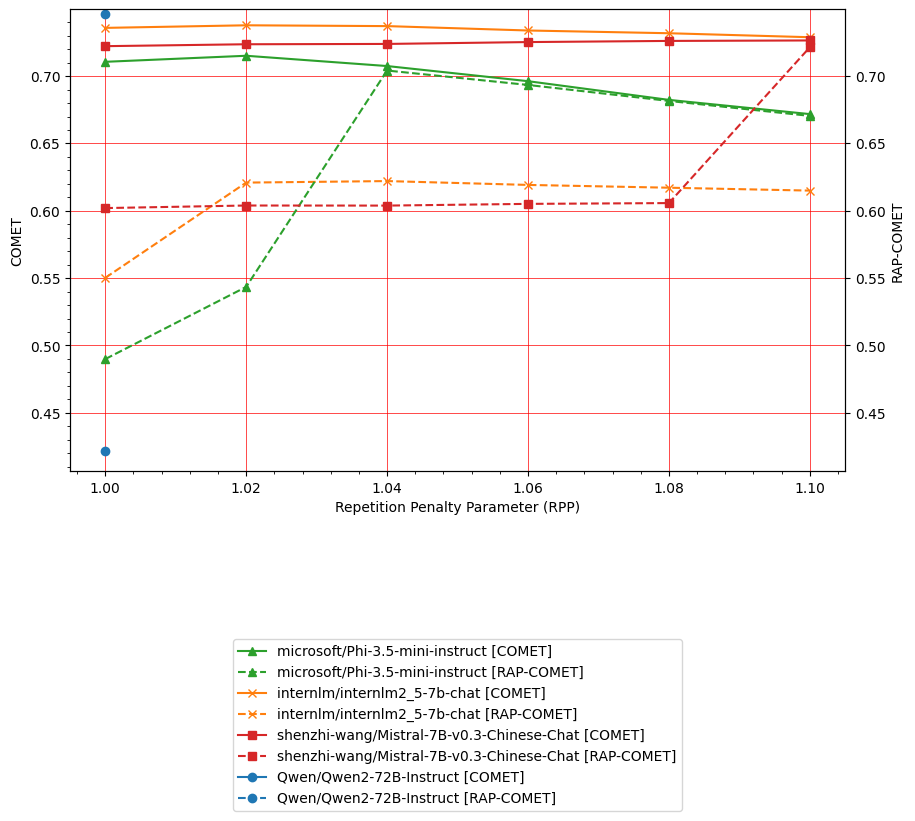

In [16]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["comet", "rap"],
    ["COMET", "RAP-COMET"],
    sync_y_axis=True,
)

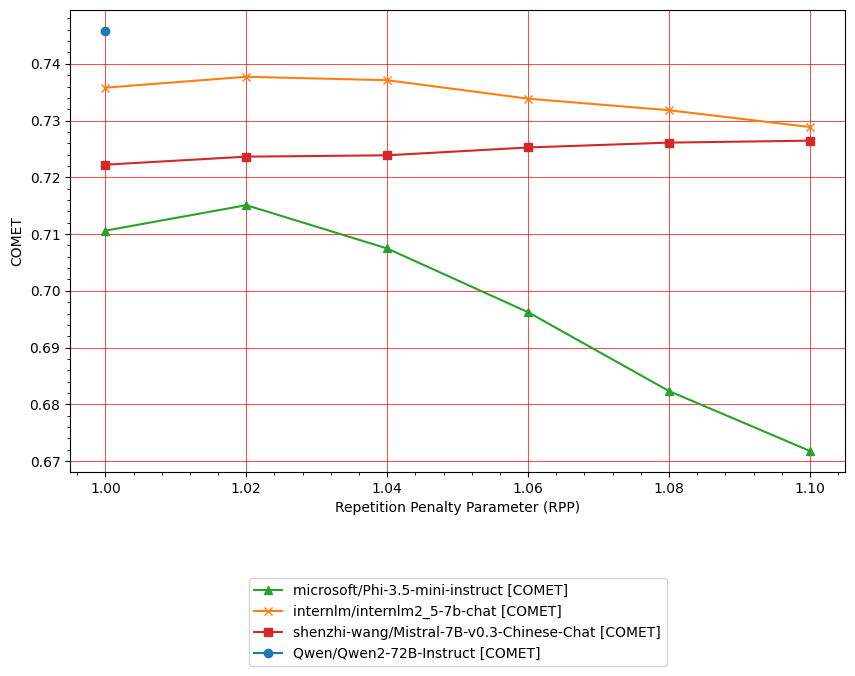

In [17]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["comet"],
    ["COMET"],
)

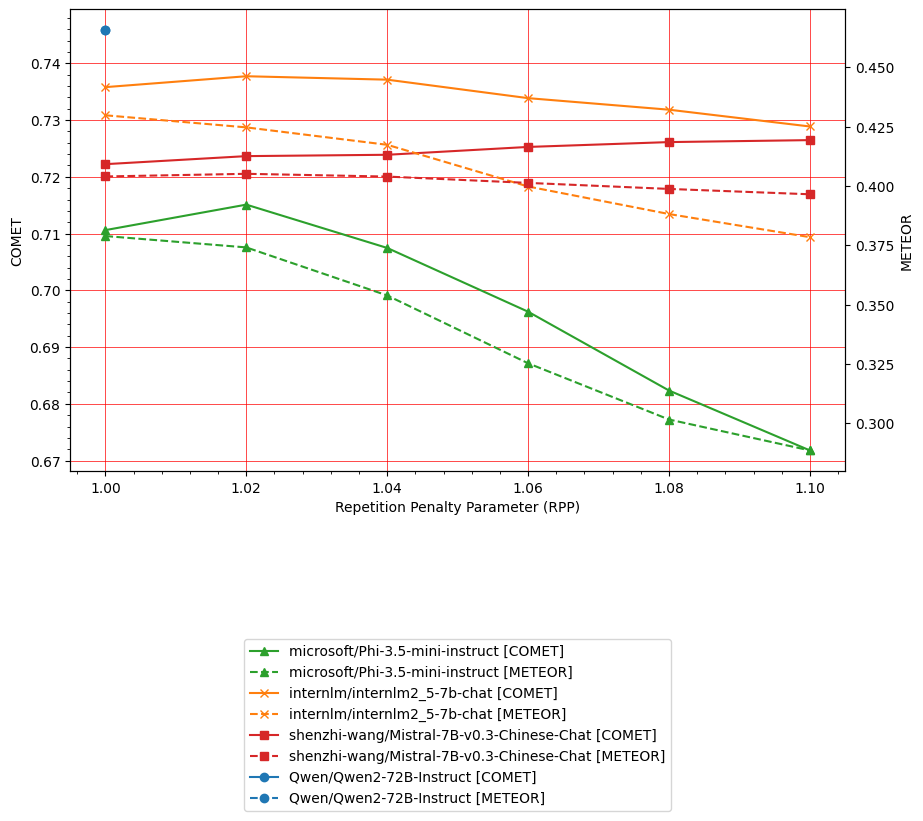

In [18]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["comet", "meteor"],
    ["COMET", "METEOR"],
)

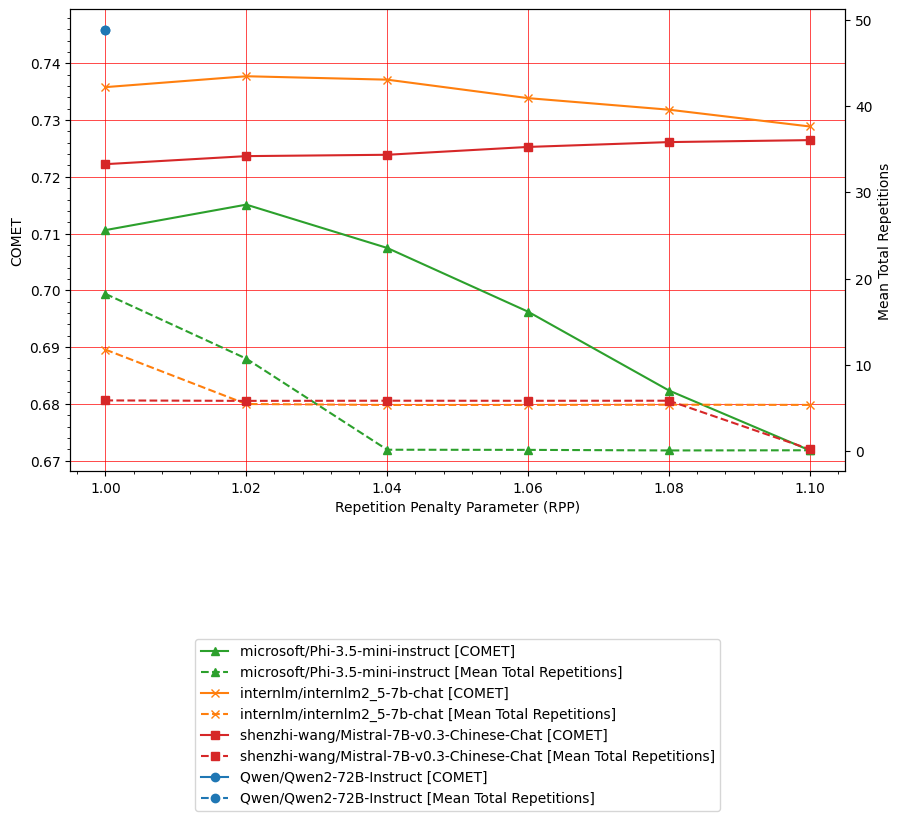

In [19]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["comet", "total_repetitions"],
    ["COMET", "Mean Total Repetitions"],
)

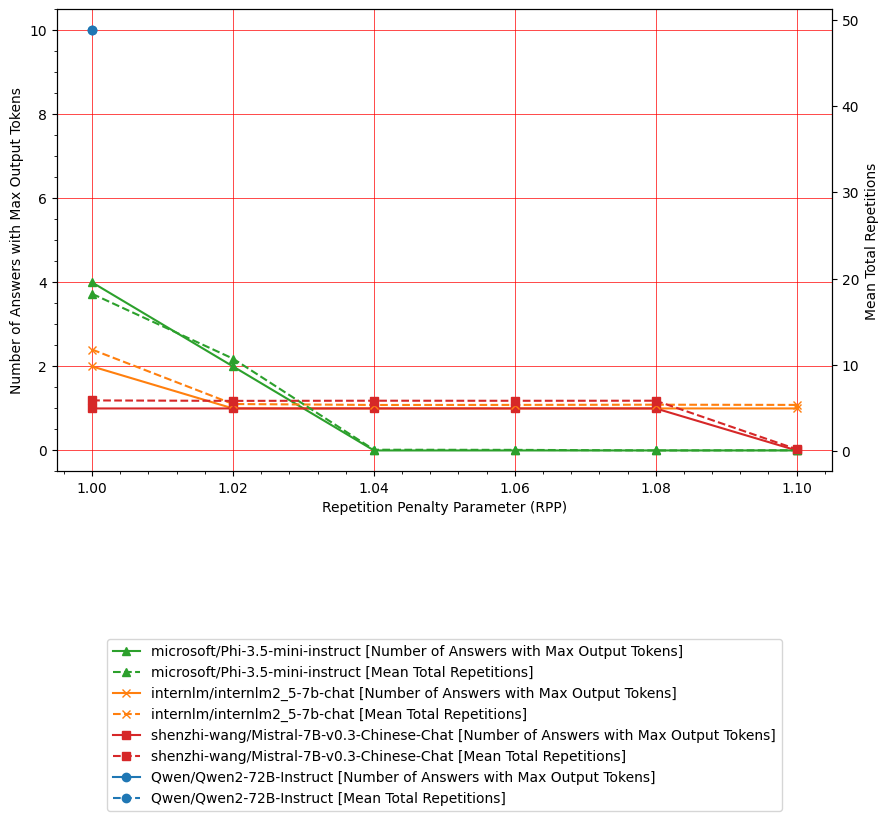

In [20]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["num_max_output_tokens", "total_repetitions"],
    ["Number of Answers with Max Output Tokens", "Mean Total Repetitions"],
)

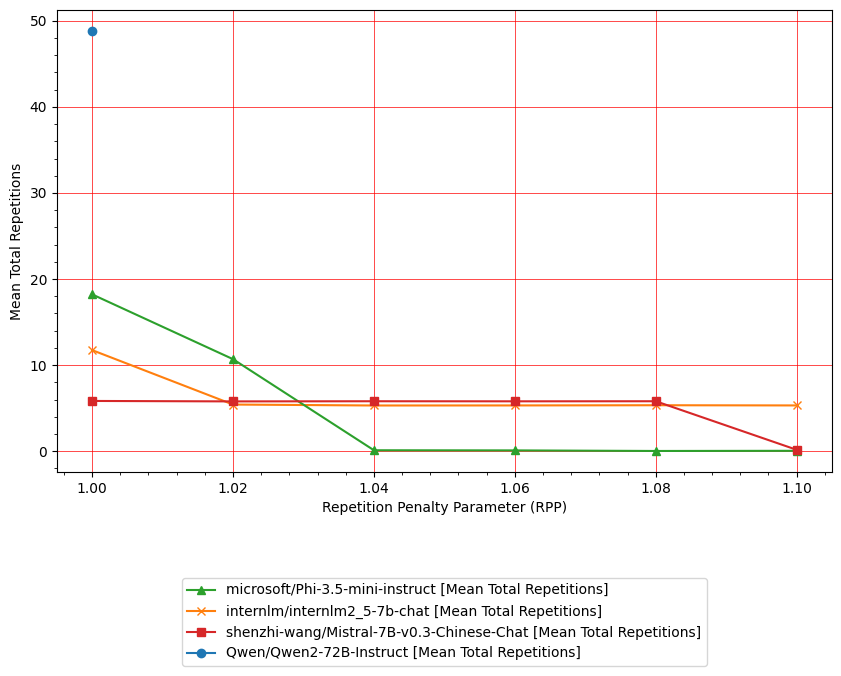

In [22]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["total_repetitions"],
    ["Mean Total Repetitions"],
)

In [21]:
for col in result_columns:
    print(f"### Analyzing: {col}")
    analyze_translation_results(
        df, col, repetition_threshold=50, max_new_tokens=max_new_tokens
    )

### Analyzing: Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00
*** Found 14 rows with total_repetitions > 50 for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00
文洁默默地转身走去，任双脚将她带向别处。
Wenjie turned around, not caring where her feet would carry her.
 Wenjie turned and walked away, letting her feet take her somewhere else. She didn't know where she was going. She didn't care. She just wanted to get away from the place where she had killed a man. She wanted to get away from the place where she had killed a man. She wanted to get away from the place where she had killed a man. She wanted to get away from the place where she had killed a man. She wanted to get away from the place where she had killed a man. She wanted to get away from the place where she had killed a man. She wanted to get away from the place where she had killed a man. She wanted to get away from the place where she had killed a man. She wanted to get away from the place where she had killed a man. She wanted to get away fro